This is a preamble that installs FEniCS from the Ubuntu PPA and defines some plotting utilities.

In [3]:
#@Demo1_Heat
# Setup system environment and define utility functions and variables
from google.colab import files
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !sed -e 's:artful:bionic:' /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-artful.list > temp
    !mv temp /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-artful.list
    !sed -e 's:artful:bionic:' /etc/apt/sources.list > temp
    !mv temp /etc/apt/sources.list
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics    
    from dolfin import *; from mshr import *
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display, update_display; import time; import dolfin.common.plotting as fenicsplot 
import time
from ufl import replace

def plot_compact(u, t, stepcounter, QQ, pl, ax, label = "Velocity", clear = True): # Compact plot utility function
  if stepcounter == 0:
    pl, ax = plt.subplots(); display(pl);
    if clear:
      clear_output(); # Plotting setup
  if stepcounter % 5 == 0:
    uEuclidnorm = project(sqrt(inner(u, u)), QQ); ax.cla(); fig = plt.gcf(); fig.set_size_inches(16, 4)
    plt.subplot(1, 2, 1); pp = plot(uEuclidnorm, cmap="coolwarm", label=label); plt.title("%s at t=%f" % (label, t)) # Plot norm of velocity
    if t == 0.: plt.axis(G); plt.colorbar(pp, shrink=0.5); 
    #plt.subplot(1, 2, 2);
    #if t == 0.: Q.mesh(); plt.title("Mesh") # Plot mesh
    plt.tight_layout(); dpl = display(pl, display_id="test");
  return (pl, ax)

def plot_compact_static(u, QQ, label = "Velocity"): # Compact plot utility function
  pl, ax = plt.subplots();display(pl);
  uEuclidnorm = project(sqrt(inner(u, u)), QQ); ax.cla(); fig = plt.gcf(); fig.set_size_inches(16, 4)
  plt.subplot(1, 2, 1); pp = plot(uEuclidnorm, cmap="coolwarm"); plt.title("%s" % (label)) # Plot norm of velocity
  plt.axis(G);plt.colorbar(pp, shrink=0.5); 
  plt.subplot(1, 2, 2);
  plot(Q.mesh()); plt.title("Mesh") # Plot mesh
  plt.tight_layout();dpl = display(pl, display_id="test");
  return (pl, ax)


E: Package 'python-software-properties' has no installation candidate
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/fenics-packages/fenics/ubuntu bionic InRelease [15.4 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:12 https://developer.do

Upload mesh file, subdomain file and velocity field.

In [18]:
# Load mesh dolfin_fine.xml.gz,
# subdomains dolfin_fine_subdomains.xml.gz
# and dolfin_fine_velocity.xml.gz
files.upload()

Saving dolfin_fine.xml.gz to dolfin_fine.xml.gz
Saving dolfin_fine_subdomains.xml.gz to dolfin_fine_subdomains.xml.gz
Saving dolfin_fine_velocity.xml.gz to dolfin_fine_velocity.xml.gz


{'dolfin_fine.xml.gz': b'\x1f\x8b\x08\x00\x1e\xf4JQ\x00\x03\x8c\x95\xcdN\x1b1\x14\x85\xf7<\xc5\xc8\xfb&\xbe\xff\xd7\x88\xc0\xaeO\xd0>@\x95\x0ct\xa40A$*\xd0\xa7\xaf)\xb9f\x13\x8f\xd8D\xb2\xc6_\xe6\\\x9f\xe337w\xaf\x8f\xfb\xe1\xcf\xf8|\x9c\x0e\xf3&\xc1*\xa7a\x9c\xb7\x87\xdd4?l\xd2\xcf\x1f\xdf\xbfy\xba\xbb\xbd\xba\xba\xd9\x1d\xf6\xf7\xd3<\xd4\xdd\xf3\xf1\xfac\xb1I\xbfO\xa7\xa7\xeb\xf5\xfa\xe5\xe5eu?\xce\xd3\xf6\xb8:<?\xac?\x9e\xae\xd3\xed\xd50\xdc<\x8e\xc7\xdf\xc3v\xdc\xefOoO\xe3&\x9d\x9e\xa7_\xf3\xc3~L\xc3nz\xdc$\xfc\xbf\xa9n\xab\nN\xd3v<\x0e\xc7\xe9o\xdd\x86\xae~~t~8\xbe\x0e\xd3\xbc\x1b_7\xa9*|\xff]\tqAJ\xc3\xdb\xfb\x82P\xb3QZw\x18\x08\x06\xb22\x06\x03\x0cE\xbb\x0c\x9e\x19V\x05\x943\x83\x85\xb2c\x97\xa1`H\x99=\x18\x07\xcc\xd2e8\x98\\X\x1bcR\xd0\xba\x8c\x9c\x19R/\xe5\x93\xa9\xc3y\x97\xd1`\xa4\n\xfa\xdak,\x10\x07\xa0\x12\xc7\x96\x91\xa0t\x19o\xe3\x08#|\xcd\x9e\x12\x0cd\x07\x0b\x86\x84\xa0\xefhn\xef\xa9\xe2\x9a6.\x8e}K\x01\x1a\x94s\xf3\x94\xc4\x8c\xb9\x0fE\x10\xc8\xc4\xb8\x05N\x9d\xf2\x82\

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/usr/lib/python3/dist-packages/dolfin/common/plotting.py:152: UserWarning: The following kwargs were not used by contour: 'label'
  return ax.tricontourf(mesh2triang(mesh), C, levels, **kwargs)


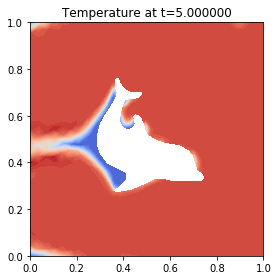

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


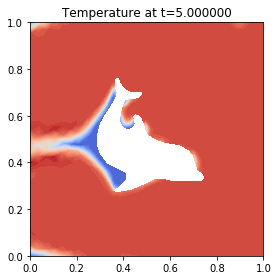

In [20]:
# Copyright (C) 2007 Kristian B. Oelgaard
# Modified by Tamara Dancheva, 2019
#
# This file is part of DOLFIN.
#
# DOLFIN is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# DOLFIN is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with DOLFIN. If not, see <http://www.gnu.org/licenses/>.
#
# Modified by Anders Logg, 2008
# Modified by Johan Hake, 2008
# Modified by Garth N. Wells, 2009
#
# This demo solves the time-dependent convection-diffusion equation by
# a SUPG stabilized method. The velocity field used in the simulation
# is the output from the Stokes (Taylor-Hood) demo.  The sub domains
# for the different boundary conditions are computed by the demo
# program in src/demo/subdomains.

from dolfin import *
import ufl
import matplotlib.pyplot as plt

def boundary_value(n):
    if n < 10:
        return float(n)/10.0
    else:
        return 1.0

mesh = Mesh("dolfin_fine.xml.gz")
sub_domains = MeshFunction("size_t", mesh, "dolfin_fine_subdomains.xml.gz");
h = CellDiameter(mesh)

# Create FunctionSpaces
Q = FunctionSpace(mesh, "CG", 1)
V = VectorFunctionSpace(mesh, "CG", 2)

# Create velocity Function from file
velocity = Function(V);
File("dolfin_fine_velocity.xml.gz") >> velocity
out_vel = File("velocity.pvd")
out_vel << velocity

# Initialise source function and previous solution function
f  = Constant(0.0)
u0 = Function(Q)

# Parameters
T = 5.0
dt = 0.1
t = dt
c = 0.00005

# Test and trial functions
u, v = TrialFunction(Q), TestFunction(Q)

# Mid-point solution
u_mid = 0.5*(u0 + u)

# Residual
r = u - u0 + dt*(dot(velocity, grad(u_mid)) - c*div(grad(u_mid)) - f)

# Galerkin variational problem
F = v*(u - u0)*dx + dt*(v*dot(velocity, grad(u_mid))*dx \
                      + c*dot(grad(v), grad(u_mid))*dx)

# Add SUPG stabilisation terms
vnorm = sqrt(dot(velocity, velocity))
F += (h/(2.0*vnorm))*dot(velocity, grad(v))*r*dx

# Create bilinear and linear forms
a = lhs(F)
#print("LHS", repr(a))
#print("LHS", ufl.algorithms.tree_format(a))
L = rhs(F)
#print("RHS:", repr(L))
#print("RHS:", ufl.algorithms.tree_format(L))

# Set up boundary condition
g = Constant(boundary_value(0.0))
bc = DirichletBC(Q, g, sub_domains, 1)

u = u0
stepcounter = 1

out_file = File("temperature.pvd")

pl, ax = plt.subplots(); display(pl); clear_output(); # Plotting setup

while t - T < DOLFIN_EPS:
    
    solve(a == L, u, bc)
    u0 = u

    out_file << (u, t)
    plot_compact(u, t, stepcounter, Q, pl, ax, "Temperature", False) 
    
    t += dt
    stepcounter += 1
    g.assign(boundary_value(int(t/dt)))



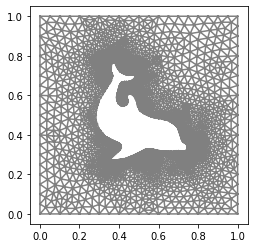

In [0]:
plot(Q.mesh())

Version 2, factoring the A matrix since we have a constant time step and it does not change. (original version of the demo included in the FEniCS demos)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
0.2
0.3
0.4
0.5
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/usr/lib/python3/dist-packages/dolfin/common/plotting.py:152: UserWarning: The following kwargs were not used by contour: 'label'
  return ax.tricontourf(mesh2triang(mesh), C, levels, **kwargs)


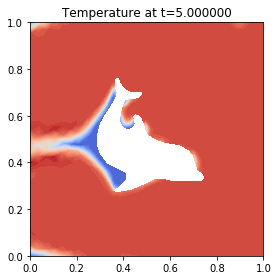

0.5
0.6
0.7
0.8
0.9


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


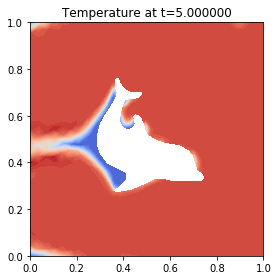

In [19]:
# Copyright (C) 2007 Kristian B. Oelgaard
#
# This file is part of DOLFIN.
#
# DOLFIN is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# DOLFIN is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public License
# along with DOLFIN. If not, see <http://www.gnu.org/licenses/>.
#
# Modified by Anders Logg, 2008
# Modified by Johan Hake, 2008
# Modified by Garth N. Wells, 2009
#
# This demo solves the time-dependent convection-diffusion equation by
# a SUPG stabilized method. The velocity field used in the simulation
# is the output from the Stokes (Taylor-Hood) demo.  The sub domains
# for the different boundary conditions are computed by the demo
# program in src/demo/subdomains.

from dolfin import *
import matplotlib.pyplot as plt

def boundary_value(n):
    if n < 10:
        return float(n)/10.0
    else:
        return 1.0

# Load mesh and subdomains
mesh = Mesh("dolfin_fine.xml.gz")
sub_domains = MeshFunction("size_t", mesh, "dolfin_fine_subdomains.xml.gz");
h = CellDiameter(mesh)

# Create FunctionSpaces
Q = FunctionSpace(mesh, "CG", 1)
V = VectorFunctionSpace(mesh, "CG", 2)

# Create velocity Function from file
velocity = Function(V);
File("dolfin_fine_velocity.xml.gz") >> velocity
out_vel = File("velocity.pvd")
out_vel << velocity

# Initialise source function and previous solution function
f  = Constant(0.0)
u0 = Function(Q)

# Parameters
T = 5.0
dt = 0.1
t = dt
c = 0.00005

# Test and trial functions
u, v = TrialFunction(Q), TestFunction(Q)

# Mid-point solution
u_mid = 0.5*(u0 + u)

# Residual
r = u - u0 + dt*(dot(velocity, grad(u_mid)) - c*div(grad(u_mid)) - f)

# Galerkin variational problem
F = v*(u - u0)*dx + dt*(v*dot(velocity, grad(u_mid))*dx \
                      + c*dot(grad(v), grad(u_mid))*dx)

# Add SUPG stabilisation terms
vnorm = sqrt(dot(velocity, velocity))
F += (h/(2.0*vnorm))*dot(velocity, grad(v))*r*dx

# Create bilinear and linear forms
a = lhs(F)
L = rhs(F)

# Set up boundary condition
g = Constant(boundary_value(0.0))
bc = DirichletBC(Q, g, sub_domains, 1)

# Assemble matrix
A = assemble(a)
bc.apply(A)

# Create linear solver and factorize matrix
solver = LUSolver(A)

# Output file
out_file = File("results/temperature.pvd")

# Set intial condition
u = u0

# Time-stepping, plot initial condition.
i = 0
i += 1

pl, ax = plt.subplots(); display(pl); clear_output(); # Plotting setup

while t - T < DOLFIN_EPS:
    # Assemble vector and apply boundary conditions
    b = assemble(L)
    bc.apply(b)

    # Solve the linear system (re-use the already factorized matrix A)
    solver.solve(u.vector(), b)

    # Copy solution from previous interval
    u0 = u

    # Plot solution
    plot_compact(u, t, i, Q, pl, ax, "Temperature", False) 

    # Save the solution to file
    out_file << (u, t)

    # Move to next interval and adjust boundary condition
    t += dt
    i += 1
    g.assign(boundary_value(int(t/dt)))


Non-linear poisson example (from FEniCS)

u = x[0] + 2*x[1] + 1
f = -10*x[0] - 20*x[1] - 10
[3.    2.75  3.125 2.5   2.875 3.25  2.25  2.625 3.    3.375 2.    2.375
 2.75  3.125 3.5   1.75  2.125 2.5   2.875 3.25  3.625 1.5   1.875 2.25
 2.625 3.    3.375 3.75  1.25  1.625 2.    2.375 2.75  3.125 3.5   3.875
 1.    1.375 1.75  2.125 2.5   2.875 3.25  3.625 4.    1.125 1.5   1.875
 2.25  2.625 3.    3.375 3.75  1.25  1.625 2.    2.375 2.75  3.125 3.5
 1.375 1.75  2.125 2.5   2.875 3.25  1.5   1.875 2.25  2.625 3.    1.625
 2.    2.375 2.75  1.75  2.125 2.5   1.875 2.25  2.   ]
[3.    2.75  3.125 2.5   2.875 3.25  2.25  2.625 3.    3.375 2.    2.375
 2.75  3.125 3.5   1.75  2.125 2.5   2.875 3.25  3.625 1.5   1.875 2.25
 2.625 3.    3.375 3.75  1.25  1.625 2.    2.375 2.75  3.125 3.5   3.875
 1.    1.375 1.75  2.125 2.5   2.875 3.25  3.625 4.    1.125 1.5   1.875
 2.25  2.625 3.    3.375 3.75  1.25  1.625 2.    2.375 2.75  3.125 3.5
 1.375 1.75  2.125 2.5   2.875 3.25  1.5   1.875 2.25  2.625 3.    1.625
 2.    2.375 2.75  1.75 

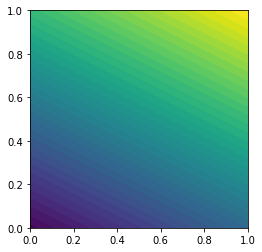

In [12]:
"""
FEniCS tutorial demo program: Nonlinear Poisson equation.

  -div(q(u)*grad(u)) = f   in the unit square.
                   u = u_D on the boundary.
"""

from __future__ import print_function
from dolfin import *

def q(u):
    "Return nonlinear coefficient"
    return 1 + u**2

# Use SymPy to compute f from the manufactured solution u
import sympy as sym
x, y = sym.symbols('x[0], x[1]')
u = 1 + x + 2*y
f = - sym.diff(q(u)*sym.diff(u, x), x) - sym.diff(q(u)*sym.diff(u, y), y)
f = sym.simplify(f)
u_code = sym.printing.ccode(u)
f_code = sym.printing.ccode(f)
print('u =', u_code)
print('f =', f_code)

# Create mesh and define function space
mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression(u_code, degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = Function(V)  # Note: not TrialFunction!
v = TestFunction(V)
f = Expression(f_code, degree=2)
F = q(u)*dot(grad(u), grad(v))*dx - f*v*dx

# Compute solution
solve(F == 0, u, bc)

# Plot solution
plot(u)

# Compute maximum error at vertices. This computation illustrates
# an alternative to using compute_vertex_values as in poisson.py.
u_e = interpolate(u_D, V)
import numpy as np
error_max = np.abs(u_e.vector()[:] - u.vector()[:]).max()
print('error_max = ', error_max)
